In [31]:
import  imageio
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from matplotlib import animation

vid_reader = imageio.get_reader('ropeWaveClip02.mov', 'ffmpeg')

In [32]:
def get_rope_position_of_frame(frame_rgb):
    frame = np.array(Image.fromarray(frame_rgb).convert('HSV')).astype(np.float32)
    frame[:, :, 0] = frame[:, :, 0] * (np.pi/180)
    dist_from_yellow = np.linalg.norm(frame-np.array([0.6457718, 152., 243.]), axis=2)
    rope_position = (719 - (np.argmin(dist_from_yellow, axis=0)))
    return rope_position

def get_rope_positions_of_video(vid_reader):
    rope_positions = []
    for i, frame in enumerate(vid_reader.iter_data()):
        rope_positions.append(
            get_rope_position_of_frame(frame))
        if i%100 == 0:
            print('Done till', i)
        
    return rope_positions

In [34]:
rope_positions = get_rope_positions_of_video(vid_reader)

Done till 0
Done till 100
Done till 200
Done till 300
Done till 400
Done till 500
Done till 600


'\nfrom IPython.display import HTML\nhtml = HTML(anim.to_html5_video())\nplt.clf()\n\nhtml\n'

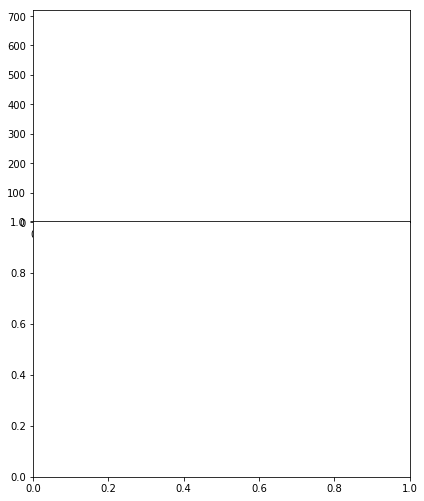

In [42]:
fig, axarr = plt.subplots(2, figsize=(6, 12))


def init():
    axarr[0].axis([0, 1280, 0, 720])
    axarr[0].set_aspect(1)
    plt.tight_layout(rect=(0, 0.39, 1, 1))
    return fig,

def animate(i):
    axarr[0].cla()
    axarr[1].cla()
    axarr[0].axis([0, 1280, 0, 720])
    axarr[0].set_aspect(1)
    plt.tight_layout(rect=(0, 0.39, 1, 1))
    axarr[0].plot(np.arange(1280), rope_positions[i])
    axarr[1].imshow(vid_reader.get_data(i))
    return fig,

anim = animation.FuncAnimation(
    fig, animate, frames=vid_reader.get_length(), init_func=init, interval=100)

from IPython.display import HTML
html = HTML(anim.to_html5_video())
plt.clf()

html

In [44]:
anim.save('extraction.mp4', writer='ffmpeg')

<Figure size 432x288 with 0 Axes>